In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_cat_counts(csv_file, column, name,count_col="Cat_Count"):
    # Read CSV
    df = pd.read_csv(csv_file)
    
    if column not in df.columns or count_col not in df.columns:
        raise ValueError(f"Required columns '{column}' and/or '{count_col}' not found in {csv_file}")
    
    # Histograms (normal + log scale)
    plt.figure(figsize=(10, 5))
    sns.histplot(df[count_col], bins=50, kde=False)
    plt.title(f"Histogram of {name} {count_col} (Normal Scale)")
    plt.xlabel(count_col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.histplot(df[count_col], bins=50, kde=False, log_scale=(True, True))
    plt.title(f"Histogram of {name} {count_col} (Log Scale)")
    plt.xlabel(count_col)
    plt.ylabel("Frequency (log)")
    plt.tight_layout()
    plt.show()
    
    # Threshold table
    thresholds = [5, 10, 25, 50, 100, 1000]
    threshold_counts = {t: (df[count_col] >= t).sum() for t in thresholds}
    threshold_df = pd.DataFrame.from_dict(threshold_counts, orient="index", columns=["Rows ≥ Threshold"])
    
    # Summary statistics
    stats_summary = {
        "min": int(df[count_col].min()),
        "max": int(df[count_col].max()),
        "median": int(df[count_col].median()),
        "mean": round(df[count_col].mean())
    }
    
    print(f"\n {name} Threshold Counts:")
    display(threshold_df)
    print(f"\n {name} Summary Statistics for Cat_Count:")
    for k, v in stats_summary.items():
        print(f"{k.capitalize()}: {v}")
    
    return threshold_df, stats_summary


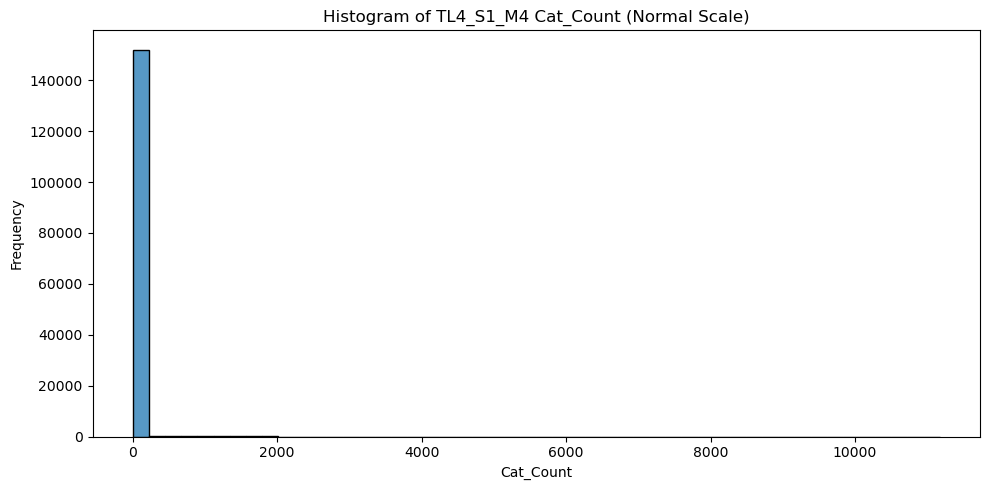

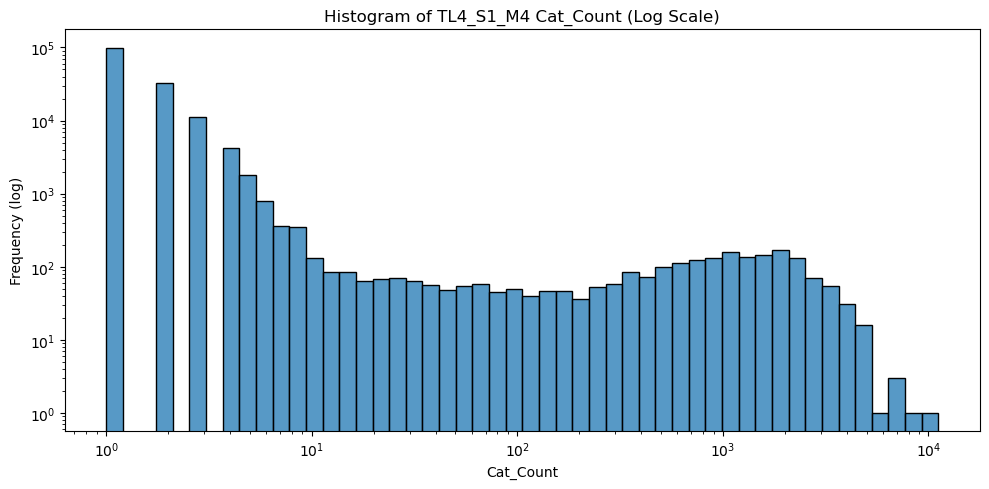


 TL4_S1_M4 Threshold Counts:


,Rows ≥ Threshold
5,6005
10,2695
25,2252
50,2032
100,1840
1000,908



 TL4_S1_M4 Summary Statistics for Cat_Count:
Min: 1
Max: 11172
Median: 1
Mean: 16


In [2]:
thresholds, stats = analyze_cat_counts("TL4S1_czb_Min_map4_unique_cat.csv", column='Cat',name='TL4_S1_M4')
